<a href="https://colab.research.google.com/github/anand-bits/AI_ML_learning_project/blob/main/SVC__ANC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

data = pd.read_csv("/content/cicddos2019_dataset.csv", error_bad_lines=False)

data.head()

<ipython-input-3-c6b5fcb746bc>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/cicddos2019_dataset.csv", error_bad_lines=False)


,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [4]:
data.size

34509680

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [6]:
cols_to_exclude = ["Source IP", "Destination IP", "Flow ID", "SimillarHTTP", "Unnamed: 0"]
data = data[[col for col in data.columns if col not in cols_to_exclude]]


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 79 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  431371 non-null  int64  
 1   Flow Duration             431371 non-null  int64  
 2   Total Fwd Packets         431371 non-null  int64  
 3   Total Backward Packets    431371 non-null  int64  
 4   Fwd Packets Length Total  431371 non-null  float64
 5   Bwd Packets Length Total  431371 non-null  float64
 6   Fwd Packet Length Max     431371 non-null  float64
 7   Fwd Packet Length Min     431371 non-null  float64
 8   Fwd Packet Length Mean    431371 non-null  float64
 9   Fwd Packet Length Std     431371 non-null  float64
 10  Bwd Packet Length Max     431371 non-null  float64
 11  Bwd Packet Length Min     431371 non-null  float64
 12  Bwd Packet Length Mean    431371 non-null  float64
 13  Bwd Packet Length Std     431371 non-null  f

In [8]:
label_counts = data['Label'].value_counts()
print(label_counts)



DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: Label, dtype: int64


In [9]:
label_counts

DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: Label, dtype: int64

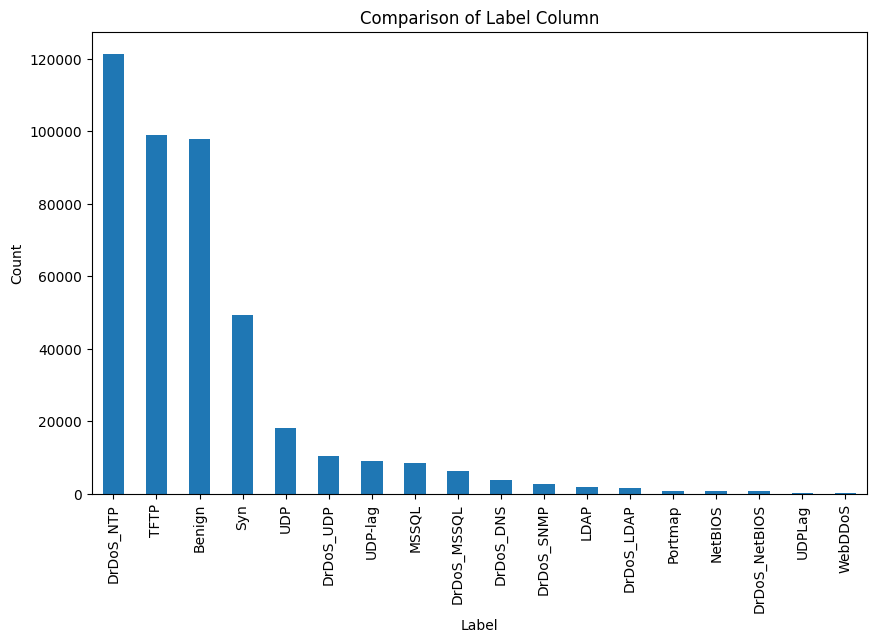

In [10]:
# Create a bar plot to visualize the label counts
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Comparison of Label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [11]:
import pandas as pd
import numpy as np
import hashlib
from sklearn.preprocessing import LabelEncoder

# Assuming 'samples_raw' is your original DataFrame
samples = data.copy()  # Create a copy of the original data

# Define a function to convert strings to numeric hash
def string2numeric_hash(text):
    return int(hashlib.md5(text.encode('utf-8')).hexdigest()[:8], 16)

# Replace 'Infinity' with 0
samples = samples.replace('Infinity', '0')

# Replace np.inf with 0
samples = samples.replace([np.inf, -np.inf], '0')

# Convert columns to numeric
samples['Flow Packets/s'] = pd.to_numeric(samples['Flow Packets/s'], errors='coerce')

samples['Flow Bytes/s'] = pd.to_numeric(samples['Flow Bytes/s'], errors='coerce')

# Fill missing values in 'Flow Bytes/s' with 0
samples['Flow Bytes/s'] = samples['Flow Bytes/s'].fillna(0)

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to the 'Label' column and transform the labels
samples['Label'] = label_encoder.fit_transform(samples['Label'])


# Get the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
for label, encoded_value in label_mapping.items():
    print(f"Label: {label} - Encoded Value: {encoded_value}")



print('Training data processed')


Label: Benign - Encoded Value: 0
Label: DrDoS_DNS - Encoded Value: 1
Label: DrDoS_LDAP - Encoded Value: 2
Label: DrDoS_MSSQL - Encoded Value: 3
Label: DrDoS_NTP - Encoded Value: 4
Label: DrDoS_NetBIOS - Encoded Value: 5
Label: DrDoS_SNMP - Encoded Value: 6
Label: DrDoS_UDP - Encoded Value: 7
Label: LDAP - Encoded Value: 8
Label: MSSQL - Encoded Value: 9
Label: NetBIOS - Encoded Value: 10
Label: Portmap - Encoded Value: 11
Label: Syn - Encoded Value: 12
Label: TFTP - Encoded Value: 13
Label: UDP - Encoded Value: 14
Label: UDP-lag - Encoded Value: 15
Label: UDPLag - Encoded Value: 16
Label: WebDDoS - Encoded Value: 17
Training data processed


In [12]:
samples

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Attack
1,17,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Attack
2,17,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Attack
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Attack
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Benign
431367,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Benign
431368,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Benign
431369,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Benign


In [13]:
samples.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,431371.000000,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,431371.000000,...,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,431371.000000
mean,13.948694,8.404856e+06,24.139117,2.472021,9.416956e+03,1.632896e+03,357.483674,294.721646,324.915327,20.208259,...,-2.315406e+07,3.370905e+04,2.563697e+04,6.757181e+04,1.868363e+04,2.449924e+06,4.983262e+05,2.971142e+06,1.993859e+06,6.897318
std,4.966712,2.126596e+07,195.888896,56.370208,3.445253e+04,1.064056e+05,320.025929,273.298705,268.577313,70.946085,...,1.551755e+08,3.223119e+05,2.226543e+05,5.183739e+05,2.832011e+05,7.914010e+06,2.005164e+06,9.045327e+06,7.245561e+06,5.375729
min,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,6.000000,7.870000e+02,4.000000,0.000000,7.800000e+01,0.000000e+00,37.000000,6.000000,32.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000
50%,17.000000,4.480400e+04,4.000000,0.000000,2.064000e+03,0.000000e+00,440.000000,330.000000,428.000000,0.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000
75%,17.000000,3.002508e+06,16.000000,2.000000,5.160000e+03,0.000000e+00,516.000000,516.000000,516.000000,0.000000,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,13.000000
max,17.000000,1.199987e+08,86666.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,2131.000000,3015.290500,2221.556200,...,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08,17.000000


<ipython-input-14-5ff787c6f525>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(samples.corr(),annot=True)


<Axes: >

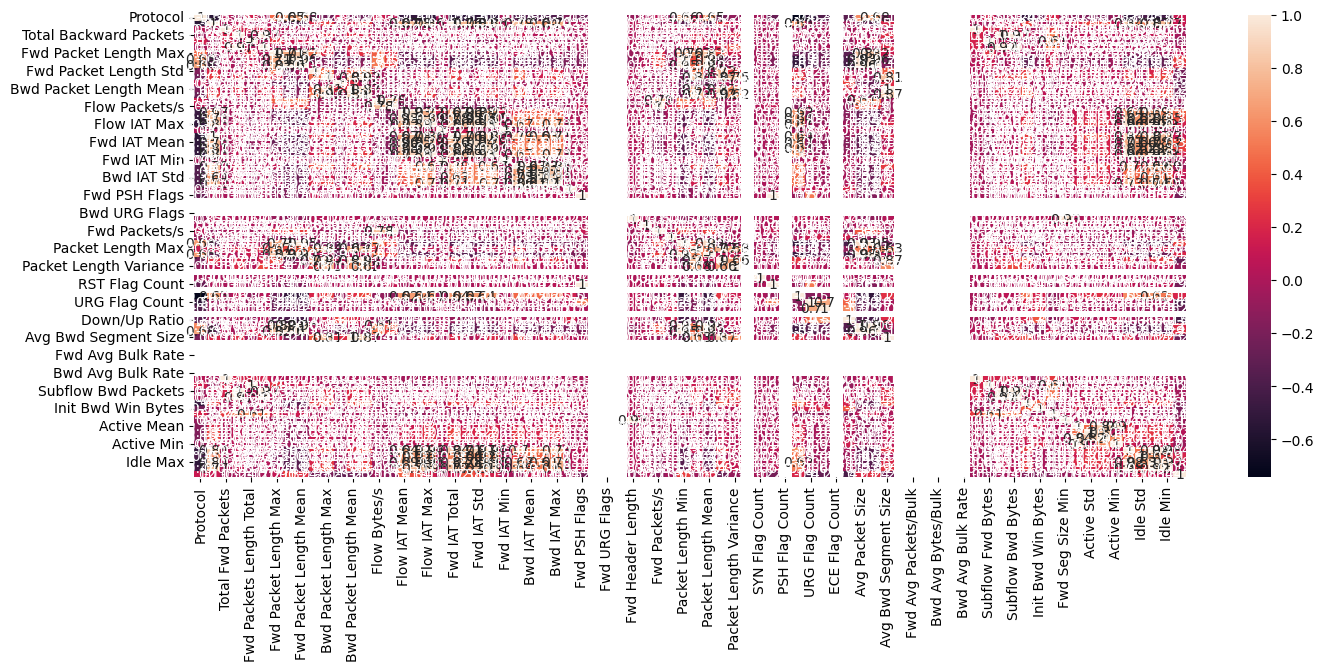

In [14]:

plt.figure(figsize=(16,6))
sns.heatmap(samples.corr(),annot=True)

In [15]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 79 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  431371 non-null  int64  
 1   Flow Duration             431371 non-null  int64  
 2   Total Fwd Packets         431371 non-null  int64  
 3   Total Backward Packets    431371 non-null  int64  
 4   Fwd Packets Length Total  431371 non-null  float64
 5   Bwd Packets Length Total  431371 non-null  float64
 6   Fwd Packet Length Max     431371 non-null  float64
 7   Fwd Packet Length Min     431371 non-null  float64
 8   Fwd Packet Length Mean    431371 non-null  float64
 9   Fwd Packet Length Std     431371 non-null  float64
 10  Bwd Packet Length Max     431371 non-null  float64
 11  Bwd Packet Length Min     431371 non-null  float64
 12  Bwd Packet Length Mean    431371 non-null  float64
 13  Bwd Packet Length Std     431371 non-null  f

In [16]:
# Assuming 'samples' is your DataFrame
X = samples.iloc[:, :-2]  # Select all rows and all columns except the last two (Label and Class)
Y = samples.iloc[:, 78]  # Select the 'Class' column as the target variable



In [17]:
X.head(),Y.head()

(   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
 0        17         216631                  6                       0   
 1        17              2                  2                       0   
 2        17             48                  2                       0   
 3        17         107319                  4                       0   
 4        17         107271                  4                       0   
 
    Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
 0                    2088.0                       0.0                  393.0   
 1                     802.0                       0.0                  401.0   
 2                     766.0                       0.0                  383.0   
 3                    1398.0                       0.0                  369.0   
 4                    1438.0                       0.0                  389.0   
 
    Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Leng

In [18]:
X.info

<bound method DataFrame.info of         Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             17         216631                  6                       0   
1             17              2                  2                       0   
2             17             48                  2                       0   
3             17         107319                  4                       0   
4             17         107271                  4                       0   
...          ...            ...                ...                     ...   
431366         6         550740                  2                       1   
431367         6         337766                  1                       3   
431368         6            228                  1                       2   
431369        17          47709                  2                       2   
431370         6         322010                 30                      33   

        Fwd Packets Length Tota

In [19]:
Y.info

<bound method Series.info of 0         Attack
1         Attack
2         Attack
3         Attack
4         Attack
           ...  
431366    Benign
431367    Benign
431368    Benign
431369    Benign
431370    Benign
Name: Class, Length: 431371, dtype: object>

In [20]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

x_train.shape

(301959, 77)

In [21]:
y_train.shape

(301959,)

In [22]:
##Scaling the Dataset


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler();
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.transform(x_test)

In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to your class labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)


In [24]:
y_train_encoded

array([0, 0, 1, ..., 0, 0, 0])

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [26]:
# Create an SVC classifier with a specific kernel (e.g., 'linear')
classifier = SVC(kernel='linear')


In [ ]:
classifier.fit(scaled_x_train, y_train_encoded)


In [ ]:
y_pred = classifier.predict(scaled_x_test)


In [ ]:
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
